# Importing Libraries

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy

# Blending images of the same size

In [3]:
#Blending images
img_1 = cv2.imread('Images/1.jpg')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_2 = cv2.imread('Images/2.jpg')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
large_img = img_1
small_img = img_2


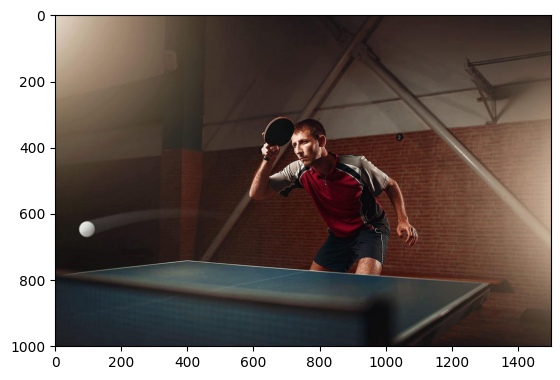

In [6]:
plt.imshow(img_1)

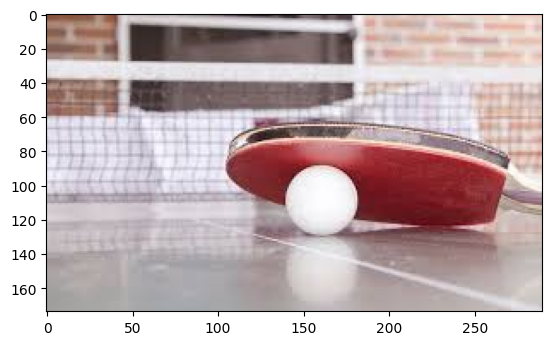

In [5]:
plt.imshow(img_2)

(1001, 1500, 3)
(174, 290, 3)


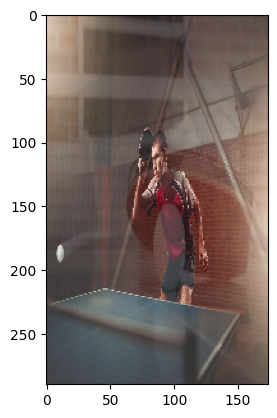

In [7]:
#Resizing both images to be the same size
print(img_1.shape)
print(img_2.shape)

img_1 = cv2.resize(img_1, (174, 290))
img_2 = cv2.resize(img_2, (174, 290))


blended = cv2.addWeighted(src1=img_1, alpha=0.8, src2=img_2, beta=0.2, gamma=10)
plt.imshow(blended)

# Overlaying

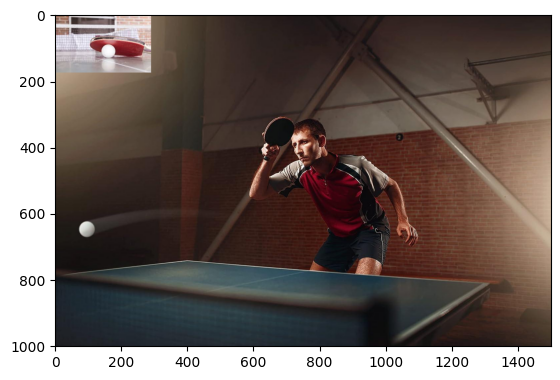

In [8]:
#Overlay images of different sizes - NO BLENDING 
#Numpy reassignment
x_offset = 0
y_offset = 0
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]
large_img[y_offset:y_end, x_offset:x_end] = small_img
plt.imshow(large_img)

# Blending and Overlaying

In [12]:
#Masking
img_1 = cv2.imread('Images/1.jpg')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_3 = cv2.imread('Images/3.jpg')
img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB)

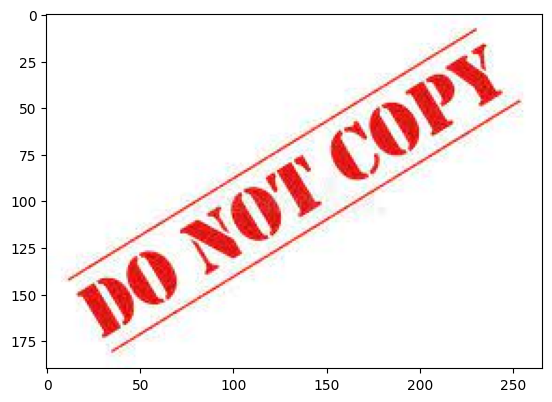

In [13]:
plt.imshow(img_3)

In [14]:
img_3.shape

(190, 266, 3)

In [15]:
img_1.shape

(1001, 1500, 3)

In [18]:
x_offset =  img_1.shape[1] - img_3.shape[1]
y_offset =  img_1.shape[0] - img_3.shape[0]
rows, columns, channels = img_3.shape
roi = img_1[y_offset:img_1.shape[0], x_offset:img_1.shape[1]]
print(roi.shape)

(190, 266, 3)


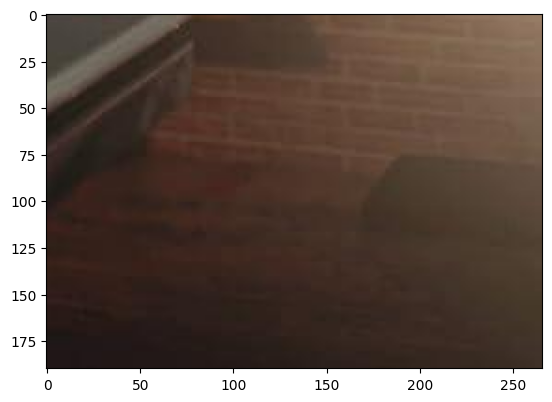

In [19]:
plt.imshow(roi)

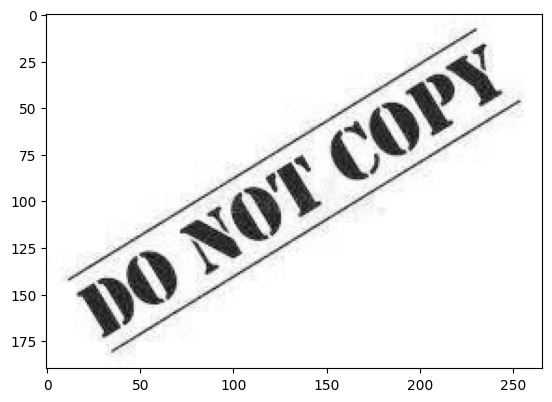

In [21]:
img_3Gray = cv2.cvtColor(img_3, cv2.COLOR_RGB2GRAY)
plt.imshow(img_3Gray, cmap='gray')

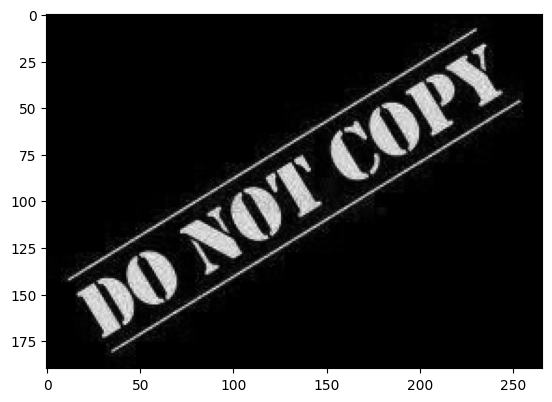

In [22]:
mask_inv = cv2.bitwise_not(img_3Gray)
plt.imshow(mask_inv, cmap='gray')

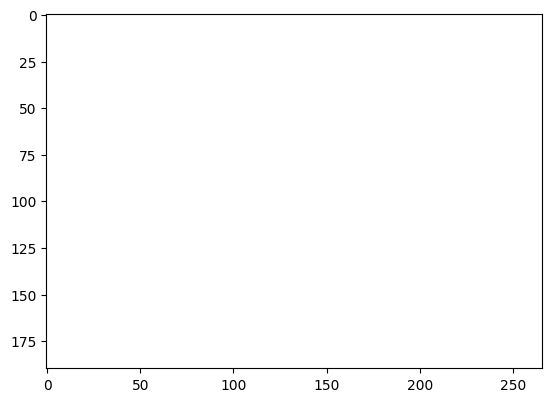

In [23]:
white_background = numpy.full(img_3.shape, 255, dtype=numpy.uint8)

In [25]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
fg = cv2.bitwise_or(img_3, img_3, mask=mask_inv)

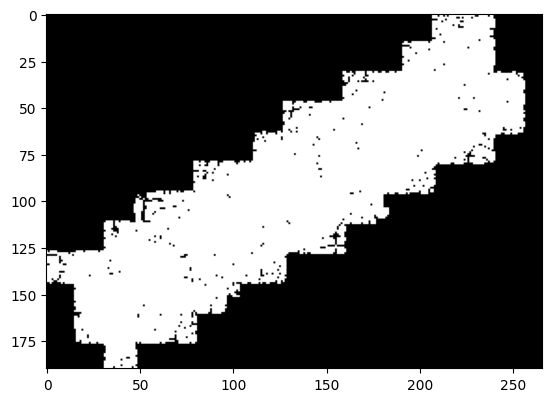

In [26]:
plt.imshow(bk)

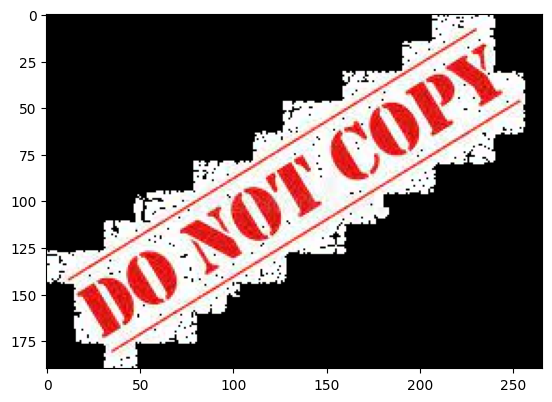

In [27]:
plt.imshow(fg)

In [28]:
final_roi = cv2.bitwise_or(roi, fg)

IndexError: index 1500 is out of bounds for axis 1 with size 1500

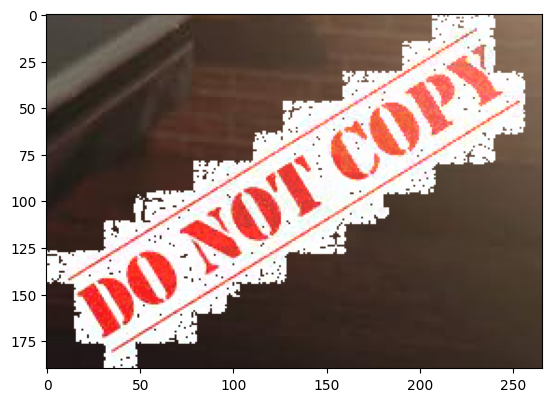

In [29]:
plt.imshow(final_roi)

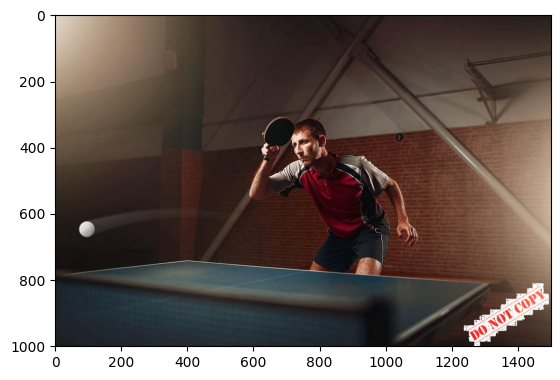

In [30]:
large_img = img_1
small_img = final_roi
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)